In [1]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
filename = "/content/googleplaystore.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.head() #first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

### Check for Null Values

In [7]:
df.isnull().sum() # Rating category has a lot of null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Drop records containing null values

In [8]:
df.dropna(inplace= True)
df.isnull().sum()
df.shape

(9360, 13)

## Incosistent Formatting
#### Conversion of 'Size' Col from MB to KB and then numeric

In [9]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [10]:
df.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [11]:
def Mb_to_kb(size):
     if size.endswith('k'):
         return float(size[:-1])
     elif size.endswith('M'):
         return float(size[:-1])*1000
     else:
         return size

In [12]:
df['Size'] = df['Size'].replace(['Varies with device'],'Nan')
df['Size'] = df['Size'].apply(lambda x: Mb_to_kb(x))
df['Size'] = df['Size'].astype(float)
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

#### Converting "Reviews" into Numeric Data Type

In [13]:
df['Reviews']=df["Reviews"].astype(int)

Removing ',' and '+' sign from Installs and changing it to the numeric data type

In [14]:
df['Installs'].unique() #all the unique values of Installs

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [15]:
df['Installs']=df['Installs'].apply(lambda x:x.replace(",",''))
df['Installs']=df['Installs'].apply(lambda x:x.replace("+",''))
df['Installs']=df['Installs'].astype(int)

#### Converting Price into Numeric Data Type

In [16]:
df['Price'].unique() #all the unique values of Price

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [17]:
df['Price']=df['Price'].apply(lambda x:x.replace("$",''))
df['Price']=df['Price'].astype(float)

### Sanity Checks

##### Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [18]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5] #No such values exist in our datset.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df.shape

(9360, 13)

##### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [20]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,15371.15,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


We found 11 such records where reviews are more than installs.

In [21]:
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)

In [22]:
df.loc[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Dropped the rows and now no such value exists.

In [23]:
df.shape

(9353, 13)

#### For free apps (type = “Free”), the price should not be>0. If so, drop those rows.

In [24]:
df.loc[(df['Type'] == 'Free') & (df['Price'] != 0)] #No such value exists

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
df.shape

(9353, 13)

**Univariate Analysis**

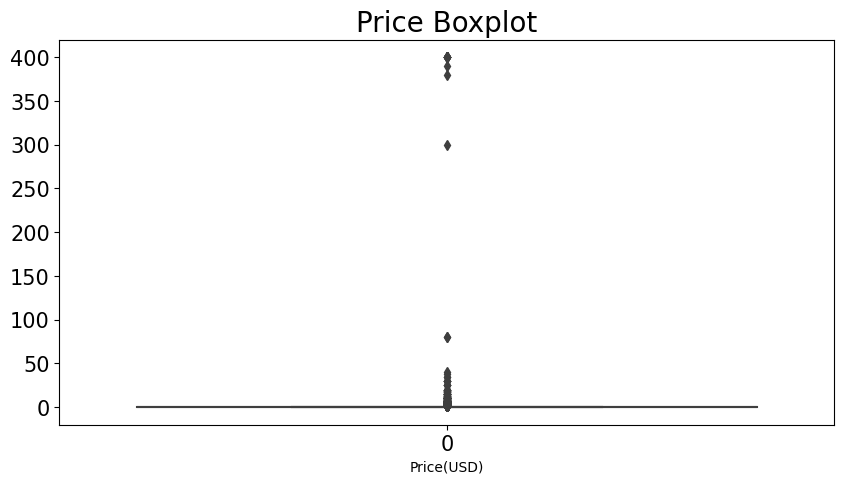

In [26]:
# Boxplot for Price

plt.figure(figsize=(10, 5))
b=sns.boxplot(df.Price)
b.axes.set_title("Price Boxplot",fontsize=20)
b.set_xlabel("Price(USD)",fontsize=10)
b.tick_params(labelsize=15)

App prices are usually free or below 10 USD. Here, we can see that a few of the apps are highly priced, i.e more than 200 USD. These can be considered as outliers.

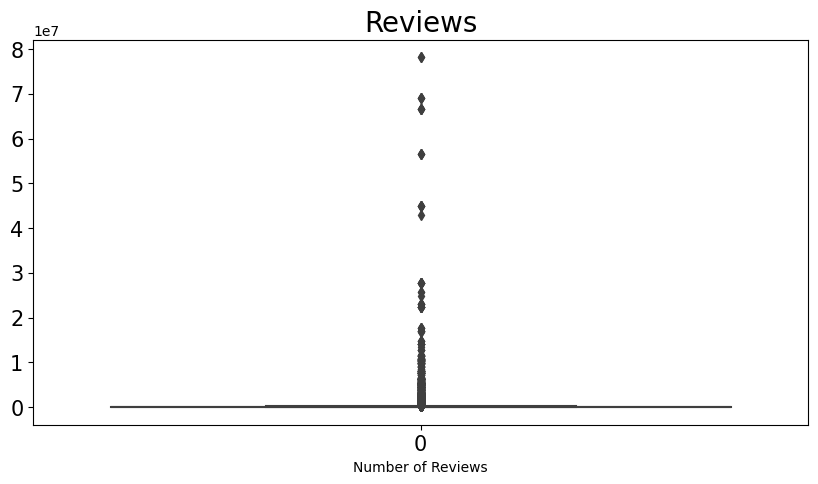

In [27]:
# Boxplot for Reviews

plt.figure(figsize=(10, 5))
b=sns.boxplot(df.Reviews)
b.axes.set_title("Reviews",fontsize=20)
b.set_xlabel("Number of Reviews",fontsize=10)
b.tick_params(labelsize=15)

There are few apps with high number of reviews. They don't seem usual and lead to skewness in the data. Hence, outliers.

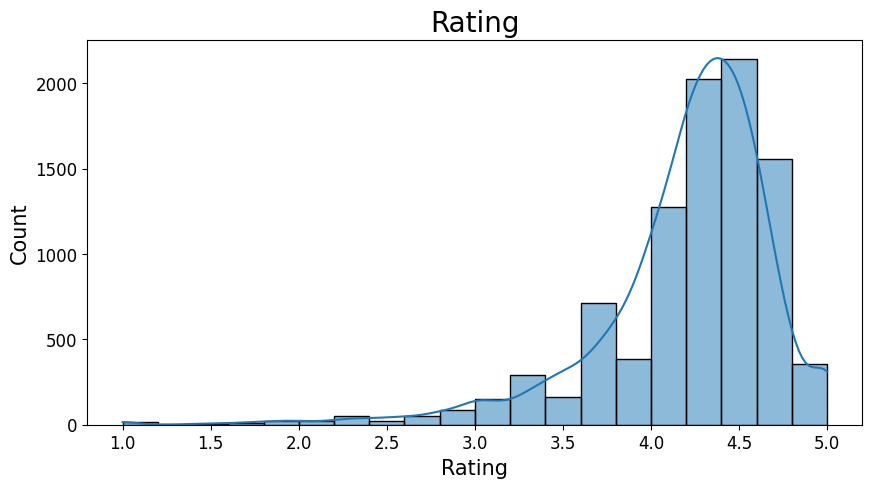

In [28]:
#Histogram for Rating

plt.figure(figsize=(10, 5))
h=sns.histplot(df.Rating,bins=20,kde=True)
h.axes.set_title("Rating",fontsize=20)
h.set_xlabel("Rating",fontsize=15)
h.set_ylabel("Count",fontsize=15)
h.tick_params(labelsize=12)

Ratings are ranging usually between 3-5, major of which are 4.5. Normally distributed but are left skewed and are towards higher ratings.

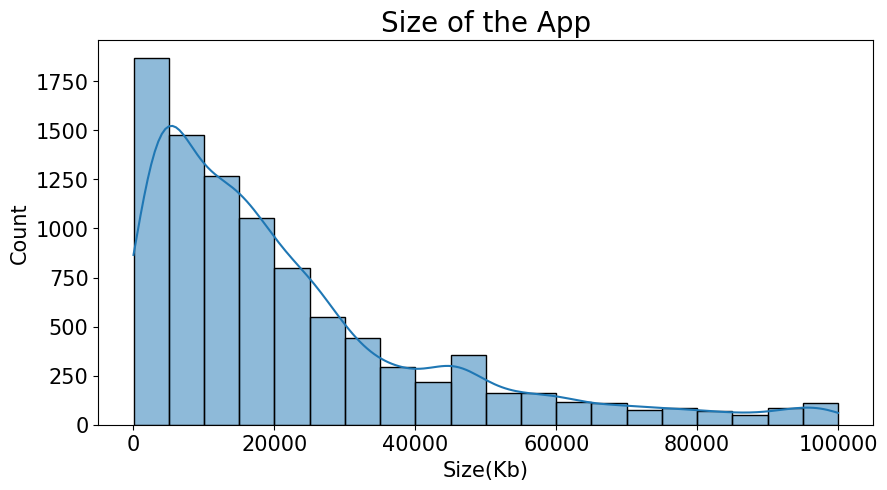

In [29]:
#Histogram for Size

plt.figure(figsize=(10, 5))
h=sns.histplot(df.Size,bins=20,kde=True)
h.axes.set_title("Size of the App",fontsize=20)
h.set_xlabel("Size(Kb)",fontsize=15)
h.set_ylabel("Count",fontsize=15)
h.tick_params(labelsize=15)

**Outlier Treatment**

In [30]:
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [31]:
#Dropping records as these mostly seem as an outlier/junk apps

high_price = df.loc[df['Price']>200].index
df.drop(labels=high_price, inplace=True)

In [32]:
df.loc[df['Price']>200] #No such values now, as they have been dropped.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
df.shape

(9338, 13)

### **Apps with 2 million reviews**

In [34]:
df.loc[df['Reviews']> 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,14386.250000,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,12458.308057,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,12458.308057,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,12458.308057,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,12458.308057,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.000000,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,25245.112500,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.000000,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [35]:
# Dropping records more than 2 million reviews

gt_2m = df.loc[df['Reviews']>2000000].index
df.drop(labels=gt_2m, inplace=True)
print(gt_2m.value_counts().sum(), 'cols dropped')

453 cols dropped


In [36]:
df.shape

(8885, 13)

In [37]:
# Installs

df.Installs.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [38]:
#Choosing minimum threshold as 5% and maximum threshold as 95%

min_threshold, max_threshold=df.Installs.quantile([0.05,0.95])
df=df[(df.Installs>min_threshold) & (df.Installs<max_threshold)]

In [39]:
df.shape

(6618, 13)

### **Bivariate Analysis**

Text(45.847222222222214, 0.5, 'Rating')

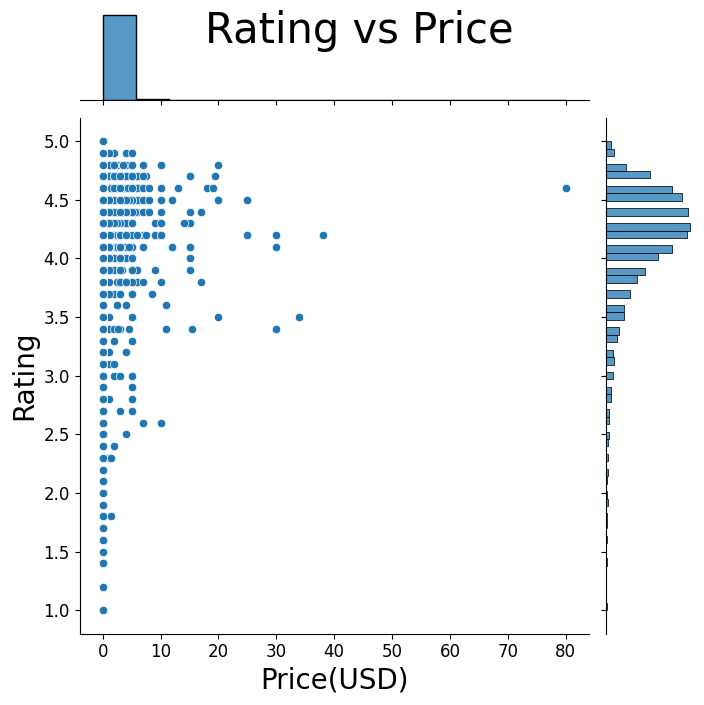

In [40]:
#Rating VS Price [Scatter Plot/Joint Plot]

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
j=sns.jointplot(y = "Rating", x = "Price", data = df,height=7)
j.fig.suptitle("Rating vs Price",fontsize=30)
j.ax_joint.set_xlabel('Price(USD)',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

On increasing the Price, the Rating remains almost constant greater than 4.

Text(45.847222222222214, 0.5, 'Rating')

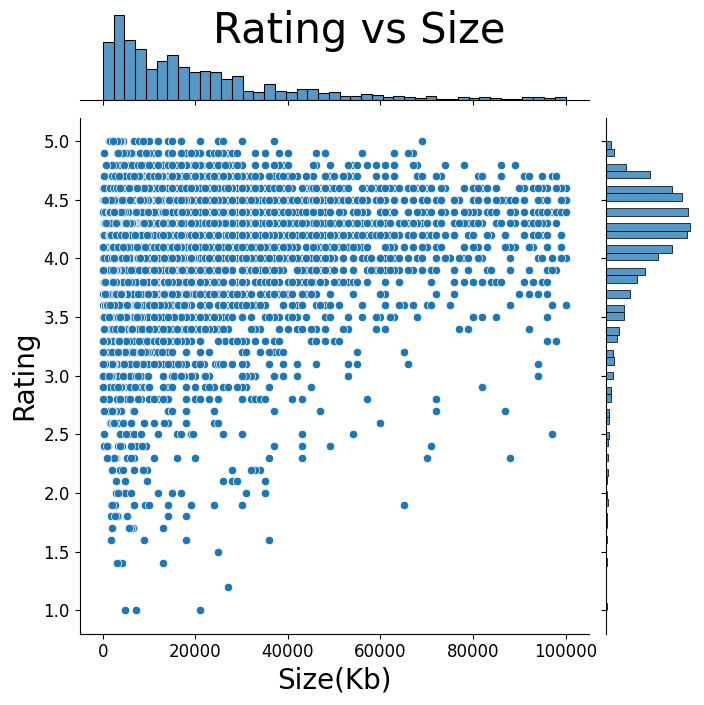

In [41]:
#Rating VS Size [Scatter Plot/Joint Plot]

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
j=sns.jointplot(y = "Rating", x = "Size", data = df, height=7)
j.fig.suptitle("Rating vs Size",fontsize=30)
j.ax_joint.set_xlabel('Size(Kb)',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

There is a correlation between Size and Rating.

Text(45.847222222222214, 0.5, 'Rating')

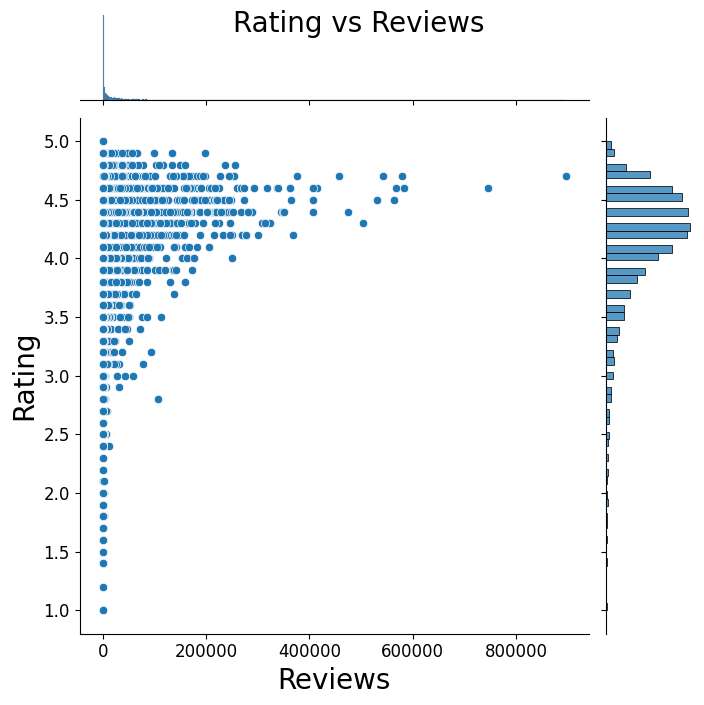

In [42]:
#Rating VS Reviews [Scatter Plot/Joint Plot]

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
j=sns.jointplot(y = "Rating", x = "Reviews", data = df,height=7)
j.fig.suptitle("Rating vs Reviews",fontsize=20)
j.ax_joint.set_xlabel('Reviews',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

More review doesnt mean a better rating always as we can observe that lower reviews have been rated high.

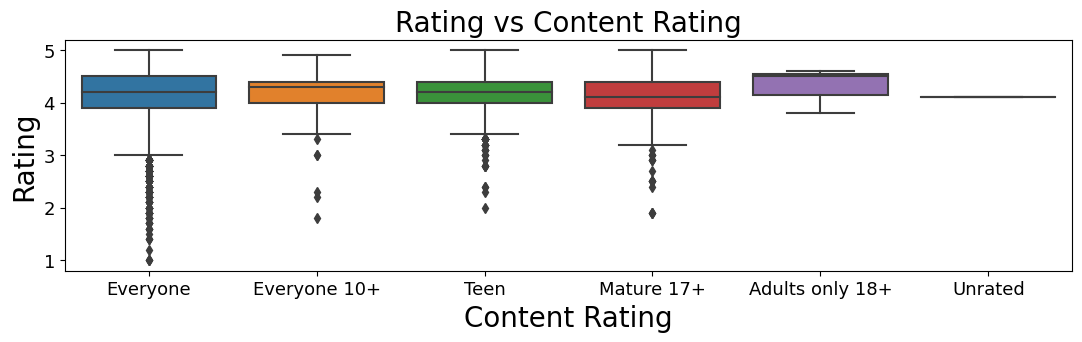

In [43]:
#Rating VS Content Rating [Boxplot]

plt.figure(figsize=(13,3))
h=sns.boxplot( x='Content Rating',y='Rating',data=df)
h.axes.set_title("Rating vs Content Rating",fontsize=20)
h.set_xlabel("Content Rating",fontsize=20)
h.set_ylabel("Rating",fontsize=20)
h.tick_params(labelsize=13)

The mean of rating of the Adult only 18+ is slightly higher than other contents. Everyone 10+ content apps come at the second place.

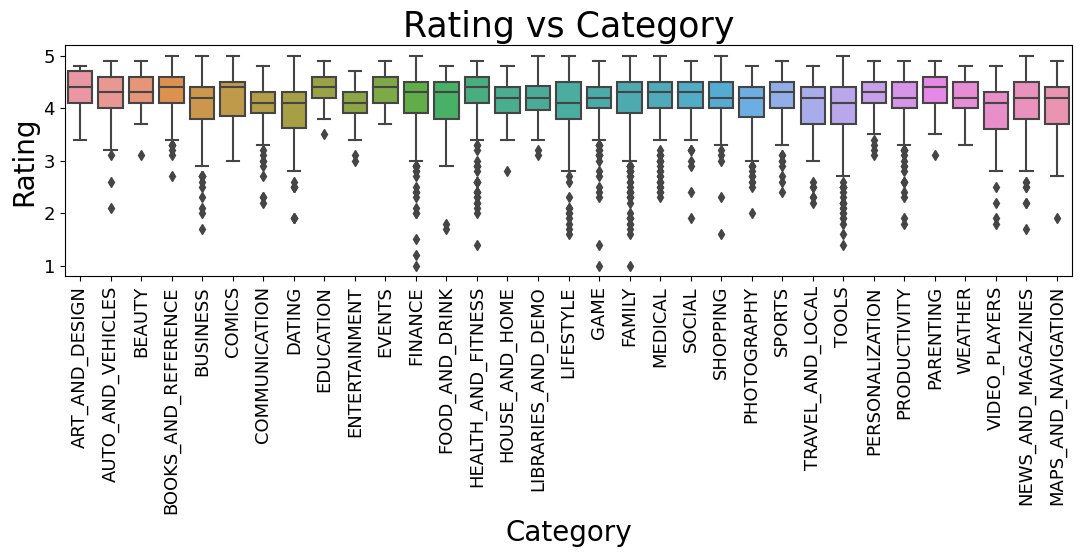

In [44]:
#Rating VS Category [Boxplot]

plt.figure(figsize=(13,3))
h=sns.boxplot( x='Category',y='Rating',data=df)
h.axes.set_title("Rating vs Category",fontsize=25)
h.set_xlabel("Category",fontsize=20)
h.set_ylabel("Rating",fontsize=20)
h.tick_params(labelsize=13)
plt.xticks(rotation=90);

'Education' has the best ratings than all of the others.

In [45]:
groupCat = df.groupby('Category')
mean_df = groupCat.mean()
mean_df = mean_df.reset_index()
mean_df.sort_values(by='Rating',ascending=False).head(3)

,Category,Rating,Reviews,Size,Installs,Price
8,EDUCATION,4.363636,38841.975207,20602.355522,1.416132e+06,0.148430
10,EVENTS,4.358824,4720.294118,13704.820433,4.690000e+05,0.000000
0,ART_AND_DESIGN,4.355556,8601.018519,12232.215837,4.486667e+05,0.110556


**Data Preprocessing**

In [46]:
inp1 = df.copy(deep=True)

Reviews and Install

In [47]:
# Applying log transformation (np.log1p) to Reviews and Installs to reduce the skewness

inp1['Installs']= np.log1p(inp1['Installs'])
inp1['Reviews']= np.log1p(inp1['Reviews'])

Text(0.5, 1.0, 'Reviews')

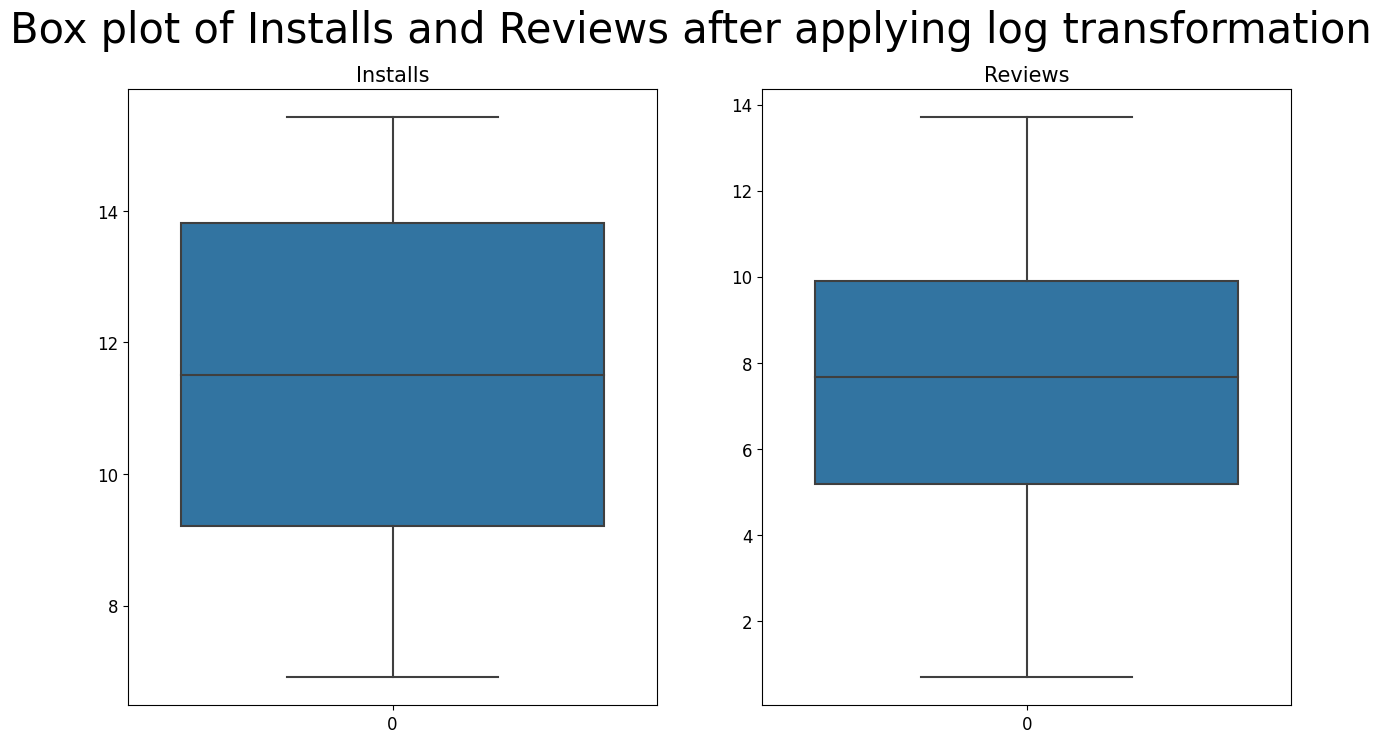

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Box plot of Installs and Reviews after applying log transformation',fontsize=30)
sns.boxplot( inp1.Installs,ax=axes[0])
sns.boxplot( inp1.Reviews,ax=axes[1],)
axes[0].set_title("Installs",fontsize=15)
axes[1].set_title("Reviews",fontsize=15)

In [49]:
# Dropping unwanted cols

inp1.drop(['App','Last Updated', 'Current Ver', 'Android Ver', 'Type'], axis=1, inplace=True)

In [50]:
inp1.shape

(6618, 8)

In [51]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [52]:
# Creating Dummy Variables

cat_cols = ['Category', 'Content Rating', 'Genres']
inp2 = pd.get_dummies(inp1, columns=cat_cols, drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Train-Test Split : 70-30

df_train, df_test = train_test_split(inp2, train_size=0.70, random_state=0)
df_train.shape,df_test.shape

((4632, 150), (1986, 150))

In [54]:
# Separate the dataframes into X_train, y_train, X_test, and y_test

y_train=df_train.Rating
X_train=df_train.drop(['Rating'],axis=1)

In [55]:
y_test=df_test.Rating
X_test=df_test.drop(['Rating'],axis=1)

In [56]:
X_train.shape, X_test.shape

((4632, 149), (1986, 149))

**Model Building**

In [57]:
# Using Linear Regression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred= reg.predict(X_train)
print('\nR2 on train set: %.2f' % r2_score(y_train, y_pred).round(decimals=2))


R2 on train set: 0.17


#### Make predictions on test set and report R2

In [59]:
y_pred2=reg.predict(X_test)
r2=r2_score(y_test,y_pred2).round(decimals=2)

In [60]:
print('\nR2: %.2f' % r2)

print('\nMean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred2))

print("\nRoot Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred2)).round(decimals=2))


R2: 0.15

Mean Squared Error: 0.23

Root Mean Squared Error 0.47
